In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("car data.csv")
data = data.drop(["Car_Name"],axis =1)

In [3]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.Year.unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [5]:
data.isna().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
data.Selling_Price.describe()

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

In [7]:
data.shape

(301, 8)

In [8]:
data2 = data.copy()

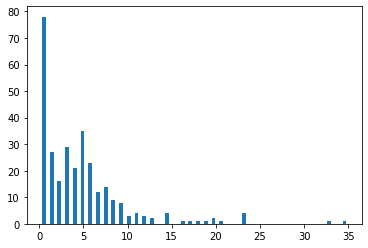

In [9]:
plt.hist(data2.Selling_Price, bins=40, rwidth=0.5);

In [10]:
data.Present_Price.describe()

count    301.000000
mean       7.628472
std        8.644115
min        0.320000
25%        1.200000
50%        6.400000
75%        9.900000
max       92.600000
Name: Present_Price, dtype: float64

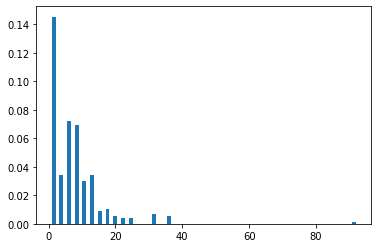

In [11]:
plt.hist(data2.Present_Price, bins = 40, rwidth= 0.5,density=True);

In [12]:
data2.Kms_Driven.describe()

count       301.000000
mean      36947.205980
std       38886.883882
min         500.000000
25%       15000.000000
50%       32000.000000
75%       48767.000000
max      500000.000000
Name: Kms_Driven, dtype: float64

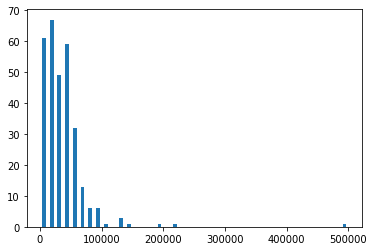

In [13]:
plt.hist(data2.Kms_Driven,bins = 40, rwidth= 0.5);

In [14]:
data2[(data2.Kms_Driven>150000)]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
84,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0
179,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
196,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [15]:
data3 = data2[(data2.Kms_Driven<150000)]

In [16]:
data2.shape[0] - data3.shape[0]

3

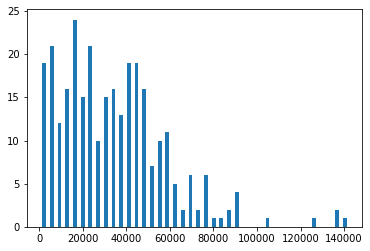

In [17]:
plt.hist(data3.Kms_Driven,bins = 40, rwidth= 0.5);

In [18]:
data3.Fuel_Type.value_counts()

Petrol    237
Diesel     59
CNG         2
Name: Fuel_Type, dtype: int64

In [19]:
data4 = data3[(data3.Fuel_Type != "CNG")]
data4.Fuel_Type.value_counts()

Petrol    237
Diesel     59
Name: Fuel_Type, dtype: int64

In [20]:
data3.shape[0] - data4.shape[0]

2

In [21]:
data4.shape

(296, 8)

In [22]:
data4.Seller_Type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [23]:
data4.Seller_Type.value_counts()

Dealer        192
Individual    104
Name: Seller_Type, dtype: int64

In [24]:
data4.Transmission.value_counts()

Manual       257
Automatic     39
Name: Transmission, dtype: int64

In [25]:
data4.Owner.value_counts()

0    285
1     10
3      1
Name: Owner, dtype: int64

In [26]:
data5 = data4[(data4.Owner !=3)]
data5.Owner.value_counts()

0    285
1     10
Name: Owner, dtype: int64

In [27]:
data5.shape

(295, 8)

In [28]:
data5.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [29]:
data6 = pd.get_dummies(data5)

In [30]:
X = data6.drop(["Selling_Price"],axis =1)
X.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,5.59,27000,0,0,1,1,0,0,1
1,2013,9.54,43000,0,1,0,1,0,0,1
2,2017,9.85,6900,0,0,1,1,0,0,1
3,2011,4.15,5200,0,0,1,1,0,0,1
4,2014,6.87,42450,0,1,0,1,0,0,1


In [31]:
y = data6.Selling_Price
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [32]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [35]:
len(X_train)

236

In [36]:
len(X_test)

59

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [62]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random forest':{
            'model' : RandomForestRegressor(),
            'params' :{
                'criterion' : ["squared_error", "absolute_error", "poisson"],
                'max_features' : ["auto", "sqrt", "log2"]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\athar\Anaconda3\envs\carprices\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
C:\Users\athar\Anaconda3\envs\carprices\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline

,model,best_score,best_params
0,linear_regression,0.849897,{'normalize': False}
1,lasso,0.782849,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.855765,"{'criterion': 'mse', 'splitter': 'best'}"
3,random forest,0.895753,"{'criterion': 'poisson', 'max_features': 'auto'}"


In [63]:
model = RandomForestRegressor(criterion='poisson',max_features='auto')

In [64]:
model.fit(X_train,y_train)

RandomForestRegressor(criterion='poisson')

In [65]:
model.score(X_test,y_test)

0.8855638612215041

In [80]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
scores = cross_val_score(RandomForestRegressor(criterion='poisson',max_features='auto'),X,y,cv =cv)
print("Model Score:",round(scores.mean(),3)*100,"%")

Model Score: 89.8 %


In [83]:
X.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

In [99]:
model.predict([[2012,6.98,37000,1,0,1,0,1,0,1]])

C:\Users\athar\Anaconda3\envs\carprices\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([4.2305])